<a href="https://colab.research.google.com/github/u-khan902/codsoftProjects/blob/main/IEC_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Portfolio Project

## Introduction
This notebook presents a machine learning project that predicts Global Active Power using household_power_consumption Dataset. The objective is to demonstrate the process from data loading and preprocessing to model training and evaluation.


## Setup and Configuration
Import all necessary libraries .




In [ ]:
# Import future statements to ensure compatibility across different Python versions
from __future__ import unicode_literals, print_function, division, absolute_import

# Import the required libraries
import matplotlib as mpl  # Matplotlib for plotting
import matplotlib.pyplot as plt  # Pyplot for easy plotting
import numpy as np  # Numpy for numerical operations
import seaborn as sns  # Seaborn for enhanced data visualization
import pandas as pd  # Pandas for data manipulation and analysis
import os  # OS module for operating system dependent functionality
from datetime import datetime  # Datetime module for handling dates and times

# Configure Matplotlib to set the default figure size and disable grid on axes
mpl.rcParams['figure.figsize'] = (10, 8)  # Set default figure size to 10 inches by 8 inches
mpl.rcParams['axes.grid'] = False  # Disable grid on axes by default


# **Loading the Dataset:**

Load your dataset and display the first few rows.

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep = ';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## **Data Preprocessing**
# Description:
This section should detail the steps taken to prepare the data for analysis. It typically includes handling missing values, data type conversions, filtering columns, and any calculations for new features.

Preprocess the data to make it suitable for analysis. This includes dealing with missing values, normalizing the data, encoding categorical variables, and other necessary steps.

In [ ]:
# Combine 'Date' and 'Time' columns into a single 'Datetime' column
# Convert the combined string to a datetime object, specifying that the day comes first in the date format
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Display the first few rows of the DataFrame to verify the new 'Datetime' column
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:
# Make a copy of the original DataFrame for safety, preserving the original data
datafram = df.copy()

# Drop the 'Date' and 'Time' columns from the DataFrame as they are now redundant
# This is because we have already combined them into the 'Datetime' column
df =df.drop(columns=['Time'])
df = df.drop(columns=[ 'Date'])

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:
df.describe()

,Sub_metering_3,Datetime
count,1.652782e+06,1664265
mean,6.375996e+00,2008-07-16 14:15:59.999996160
min,0.000000e+00,2006-12-16 17:24:00
25%,0.000000e+00,2007-10-01 15:50:00
50%,1.000000e+00,2008-07-16 14:16:00
75%,1.700000e+01,2009-05-01 12:42:00
max,3.100000e+01,2010-02-14 11:08:00
std,8.406924e+00,NaN


In [ ]:
# Convert the 'Global_active_power' column to numeric type, coercing errors to NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Convert the 'Global_reactive_power' column to numeric type, coercing errors to NaN
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')

# Convert the 'Voltage' column to numeric type, coercing errors to NaN
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Convert the 'Global_intensity' column to numeric type, coercing errors to NaN
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

# Convert the 'Sub_metering_1' column to numeric type, coercing errors to NaN
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')

# Convert the 'Sub_metering_2' column to numeric type, coercing errors to NaN
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')


In [ ]:
# Set the 'Datetime' column as the index of the DataFrame
df = df.set_index('Datetime')

# Display information about the DataFrame's index, columns, and data types
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-02-14 11:04:00,1.456,0.076,241.74,6.0,0.0,0.0,19.0
2010-02-14 11:05:00,1.448,0.078,241.29,6.0,0.0,0.0,18.0
2010-02-14 11:06:00,1.442,0.078,240.45,6.0,0.0,0.0,19.0


In [ ]:
# Check for null values in DataFrame 'df' and return a DataFrame of boolean values where 'True' indicates a null value
null_check = df.isnull()

# Sum up the null values for each column and return a Series with the sums
null_counts = null_check.sum()

# Output the total count of null values for each column
print(null_counts)

Global_active_power      11482
Global_reactive_power    11482
Voltage                  11482
Global_intensity         11482
Sub_metering_1           11482
Sub_metering_2           11482
Sub_metering_3           11483
dtype: int64


In [ ]:
df = df.resample('1d').mean()

In [ ]:
df.isnull().sum()

Global_active_power      3
Global_reactive_power    3
Voltage                  3
Global_intensity         3
Sub_metering_1           3
Sub_metering_2           3
Sub_metering_3           3
dtype: int64

In [ ]:
# Compute the rolling mean with a window size of 3000 and at least 1 non-null value
df = df.rolling(window=5, min_periods=1).mean()

# Count the number of missing (NaN) values in each column after applying the rolling mean
# This helps to identify any missing values introduced by the rolling mean calculation
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

##** Exploratory Data Analysis (EDA)**
# Description:
Explain the purpose of EDA in your project, which could include identifying patterns, anomalies, or relationships in the data. Use visualizations to support the analysis.

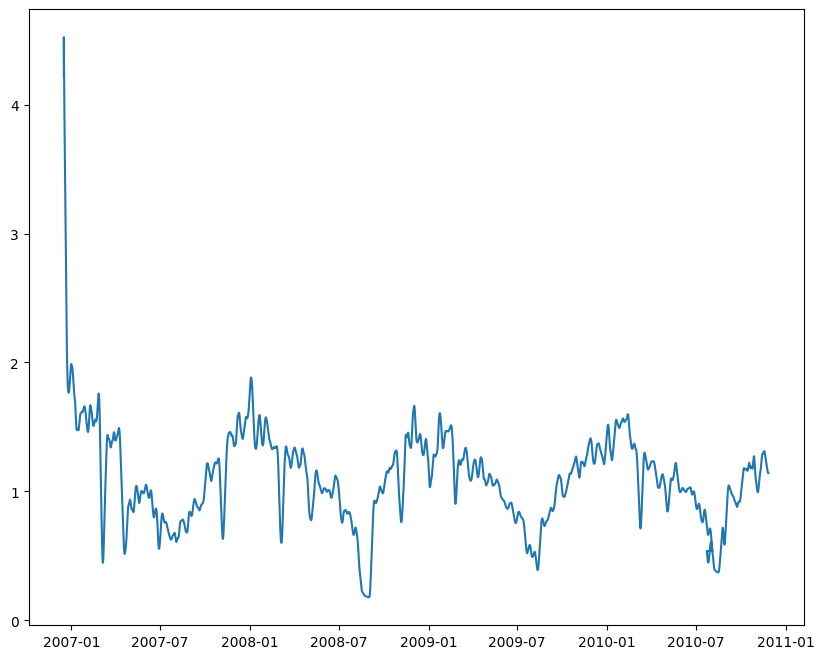

In [ ]:
# Plotting the 'Global_active_power' column from the DataFrame 'df'
plt.plot(df['Global_active_power'])

# Adding title to the plot
plt.title('Global Active Power Over Time')

# Adding labels to the axes
plt.xlabel('Time')
plt.ylabel('Global Active Power')

# Displaying the plot
plt.show()

In [ ]:
# Resampling the DataFrame 'df' to daily frequency ('1d') and calculating the mean for each day
df = df.resample('1d').mean()

# Displaying the first 100 rows of the resampled DataFrame to examine the changes
df.head(100)

# Explanation:
# - Resampling data to a lower frequency (daily, in this case) helps in reducing the number of data points
#   and aggregating the data for easier analysis.
# - By resampling to daily frequency and calculating the mean, we get average values for each day,
#   which can provide a clearer overview of trends and patterns in the data.
# - Displaying the first 100 rows helps in verifying the changes made by resampling and ensuring data integrity.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,4.458157,0.408782,234.456484,19.238060,0.000000,1.414893,16.825360
2006-12-17,4.120592,0.295852,234.743990,17.712917,0.002787,2.143696,16.226497
2006-12-18,3.742258,0.230454,235.599006,16.063320,0.080258,2.422086,14.644122
2006-12-19,3.300645,0.179629,236.771575,14.141324,0.276329,2.572109,12.860301
2006-12-20,2.943231,0.160676,237.788187,12.587157,0.489920,2.531415,11.692309
...,...,...,...,...,...,...,...
2007-03-21,1.359455,0.106550,240.188146,5.744212,1.569261,2.166589,6.283295
2007-03-22,1.342298,0.106859,240.172929,5.674145,1.612051,2.196198,6.354051
2007-03-23,1.351614,0.108222,240.196733,5.713820,1.682216,2.236666,6.554729


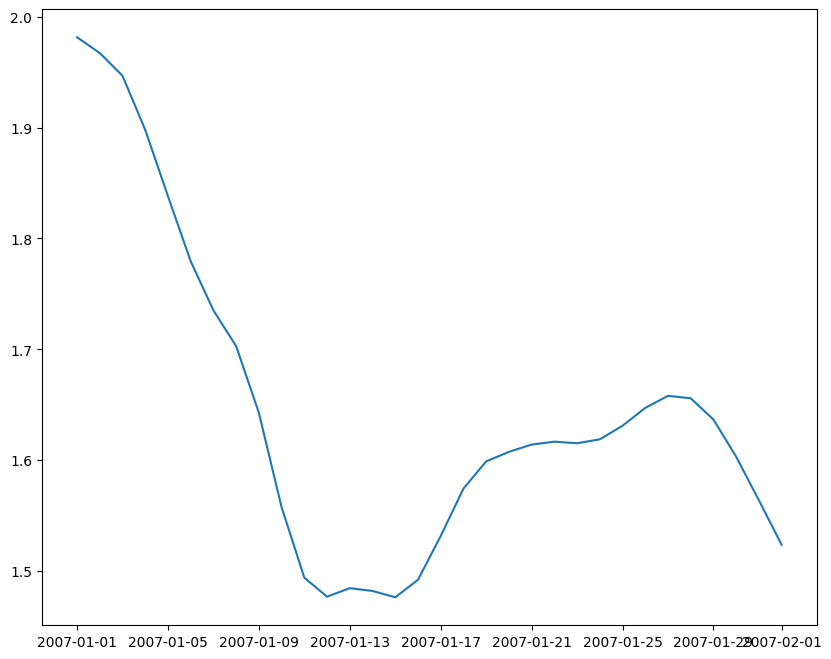

In [ ]:
# Plotting the 'Global_active_power' data for the specified date range ('2007-01-01' to '2007-02-01')
plt.plot(df['Global_active_power']['2007-01-01':'2007-02-01'])

# Adding title to the plot
plt.title('Short-Term Trend of Global Active Power (Jan-Feb 2007)')

# Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Global Active Power')

# Displaying the plot
plt.show()

# Explanation:
# - Selecting a subset of the 'Global_active_power' data for the specified date range ('2007-01-01' to '2007-02-01').
# - Plotting this subset helps in visualizing the short-term trend of global active power consumption during January and February 2007.
# - Adding a title and labels to the plot enhances clarity and understanding.
# - Displaying the plot allows for visual inspection of the short-term trend in the data.


# **Variance:**
Variance tells us how much the numbers in a dataset spread out from their average. If the variance is low, it means the numbers are close to the average. If the variance is high, it means the numbers are more spread out.

# Example:
Let's say we have a dataset of test scores: [70, 75, 80, 85, 90].

First, we find the average (mean) score: (70 + 75 + 80 + 85 + 90) / 5 = 80.
Then, we find the difference between each score and the average: [-10, -5, 0, 5, 10].
We square each difference to get rid of negative values: [100, 25, 0, 25, 100].
Finally, we find the average of these squared differences, which gives us the variance. In this case, the variance is 50.

# Overall, plotting both the original data and its variance side by side allows for a comprehensive exploration of the dataset, providing insights into both the overall behavior and the variability of the data over time.

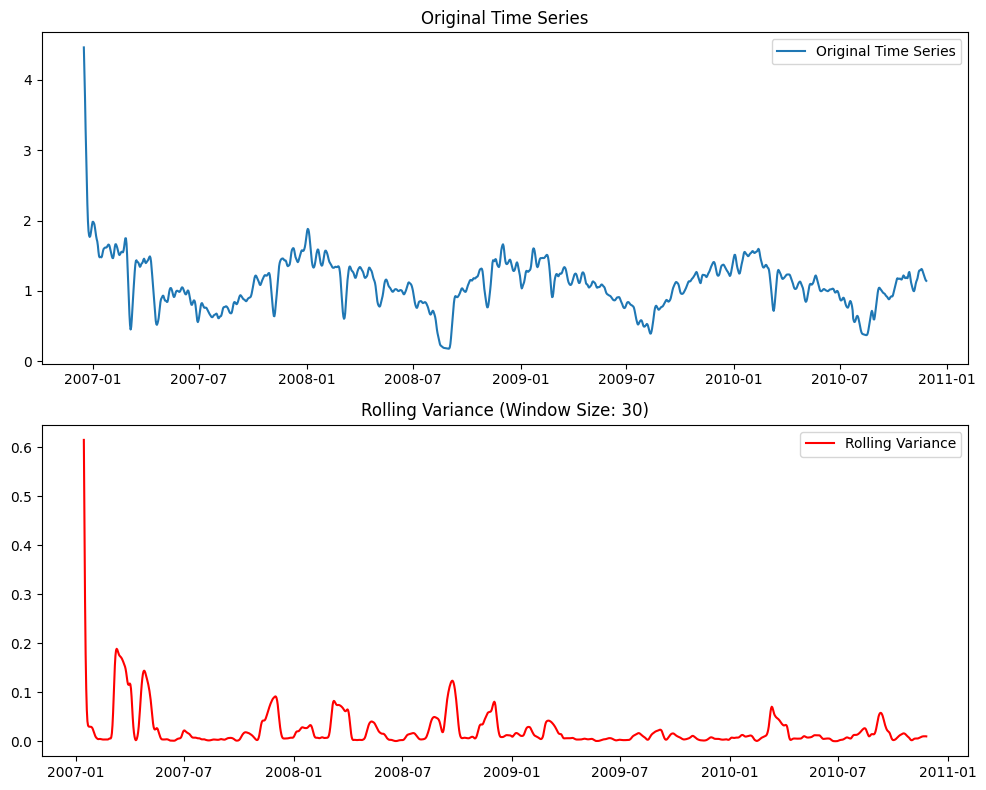

In [ ]:
# Define the size of the rolling window for calculating variance
window_size = 30

# Calculate rolling variance of the 'Global_active_power' data using the specified window size
data = df['Global_active_power'].rolling(window=window_size).var()

# Create subplots for original time series and rolling variance
plt.subplot(2, 1, 1)  # Creating a subplot grid of 2 rows and 1 column, and selecting the first subplot
plt.plot(df['Global_active_power'], label='Original Time Series')  # Plotting the original time series
plt.title('Original Time Series')  # Adding title to the subplot
plt.legend()  # Adding legend to display label

# Plot rolling variance
plt.subplot(2, 1, 2)  # Selecting the second subplot
plt.plot(data, label='Rolling Variance', color='red')  # Plotting the rolling variance
plt.title(f'Rolling Variance (Window Size: {window_size})')  # Adding title to the subplot
plt.legend()  # Adding legend to display label

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Explanation:
# - The code calculates the rolling variance of the 'Global_active_power' data using a specified window size.
# - It then creates subplots to visualize both the original time series and the rolling variance.
# - The first subplot displays the original time series data.
# - The second subplot displays the rolling variance of the data with a specified window size.
# - Titles and legends are added to provide context and distinguish between the plots.
# - The 'plt.tight_layout()' function adjusts the layout to prevent overlapping of subplots and improve readability.


# Short Term Analysis of Data

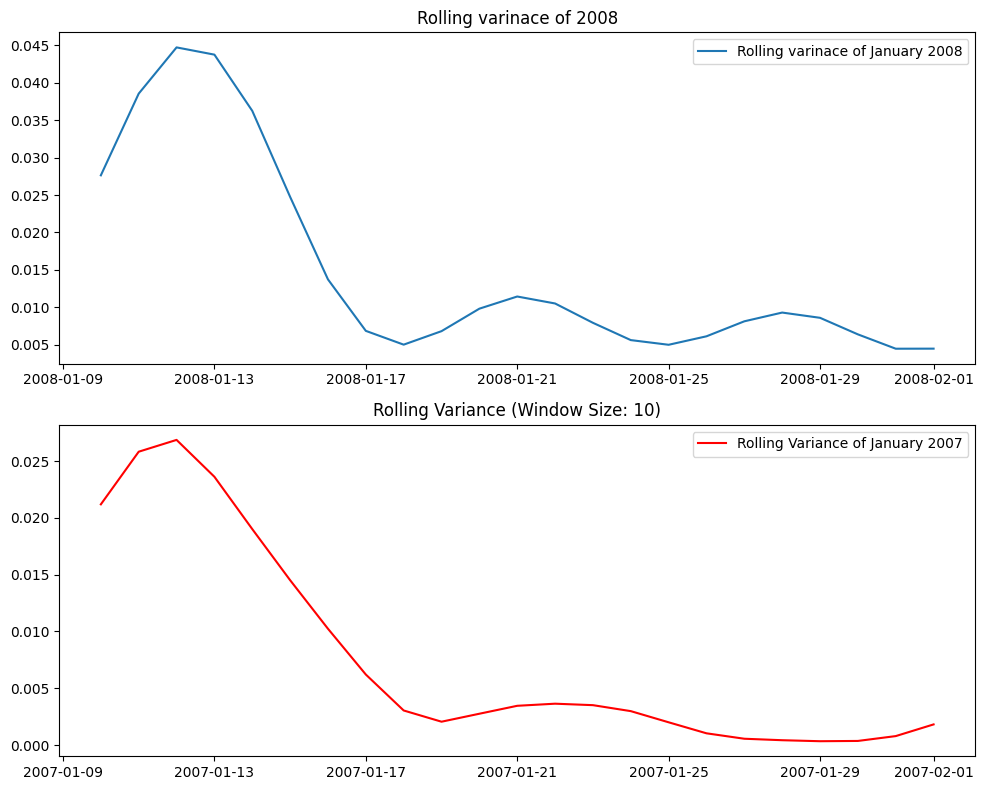

In [ ]:
# Set the window size for rolling variance calculation
window_size = 10

# Calculate rolling variance for January 2007 data
data_jan = df['Global_active_power']['2007-01-01':'2007-2-1'].rolling(window=window_size).var()

# Calculate rolling variance for January 2008 data
data_ja = df['Global_active_power']['2008-01-01':'2008-2-1'].rolling(window=window_size).var()

# Create a subplot for the first graph (January 2008)
plt.subplot(2, 1, 1)
plt.plot(data_ja, label='Rolling variance of January 2008')  # Plot the rolling variance data
plt.title('Rolling variance of 2008')  # Set the title of the subplot
plt.legend()  # Display the legend

# Create a subplot for the second graph (January 2007)
plt.subplot(2, 1, 2)
plt.plot(data_jan, label='Rolling Variance of January 2007', color='red')  # Plot the rolling variance data
plt.title(f'Rolling Variance (Window Size: {window_size})')  # Set the title of the subplot
plt.legend()  # Display the legend

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()


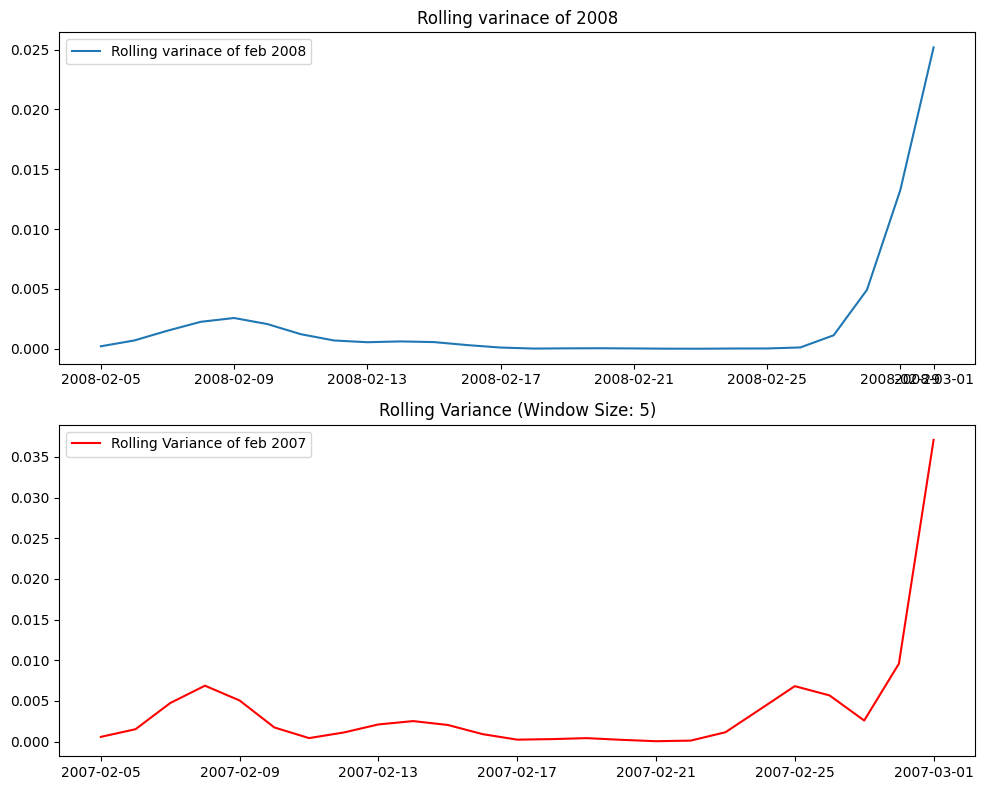

In [ ]:
# Set the window size for rolling variance calculation
window_size = 5

# Calculate rolling variance for February 2007 data
data_jan = df['Global_active_power']['2007-02-01':'2007-3-1'].rolling(window=window_size).var()

# Calculate rolling variance for February 2008 data
data_ja = df['Global_active_power']['2008-02-01':'2008-3-1'].rolling(window=window_size).var()

# Create a subplot for the first graph (February 2008)
plt.subplot(2, 1, 1)
plt.plot(data_ja, label='Rolling variance of Feb 2008')  # Plot the rolling variance data
plt.title('Rolling variance of 2008')  # Set the title of the subplot
plt.legend()  # Display the legend

# Create a subplot for the second graph (February 2007)
plt.subplot(2, 1, 2)
plt.plot(data_jan, label='Rolling Variance of Feb 2007', color='red')  # Plot the rolling variance data
plt.title(f'Rolling Variance (Window Size: {window_size})')  # Set the title of the subplot
plt.legend()  # Display the legend

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()



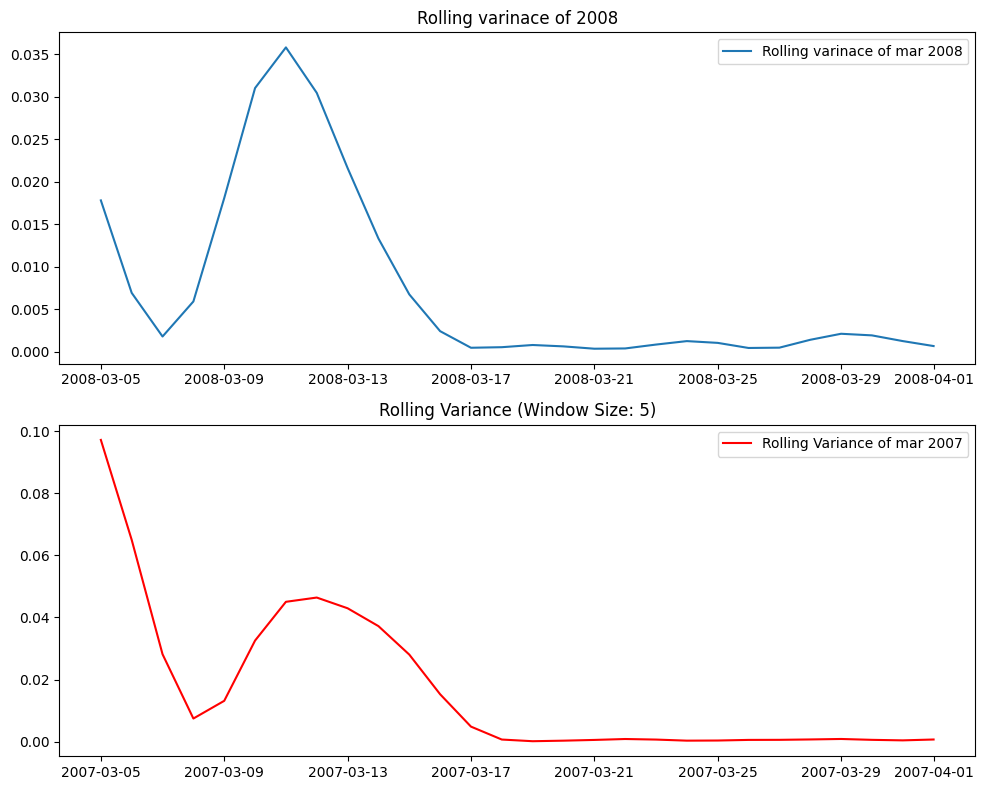

In [ ]:
# Define the window size for calculating rolling variance
window_size = 5

# Calculate rolling variance for March-April 2007 data
data_jan = df['Global_active_power']['2007-03-01':'2007-04-01'].rolling(window=window_size).var()

# Calculate rolling variance for March-April 2008 data
data_ja = df['Global_active_power']['2008-03-01':'2008-04-01'].rolling(window=window_size).var()

# Create subplots for rolling variance of March-April 2008 data
plt.subplot(2, 1, 1)  # Selecting the first subplot
plt.plot(data_ja, label='Rolling Variance of March 2008')  # Plotting rolling variance for March-April 2008
plt.title('Rolling Variance of March-April 2008')  # Adding title to the subplot
plt.legend()  # Adding legend to display label

# Create subplots for rolling variance of March-April 2007 data
plt.subplot(2, 1, 2)  # Selecting the second subplot
plt.plot(data_jan, label='Rolling Variance of March 2007', color='red')  # Plotting rolling variance for March-April 2007
plt.title(f'Rolling Variance (Window Size: {window_size})')  # Adding title to the subplot
plt.legend()  # Adding legend to display label

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Explanation:
# - The code calculates the rolling variance for March-April 2007 and March-April 2008 data separately.
# - It creates subplots to visualize the rolling variance of each time period.
# - The first subplot displays the rolling variance for March-April 2008 data.
# - The second subplot displays the rolling variance for March-April 2007 data.
# - Titles and legends are added to provide context and distinguish between the plots.


array([[<Axes: title={'center': 'Global_active_power'}>]], dtype=object)

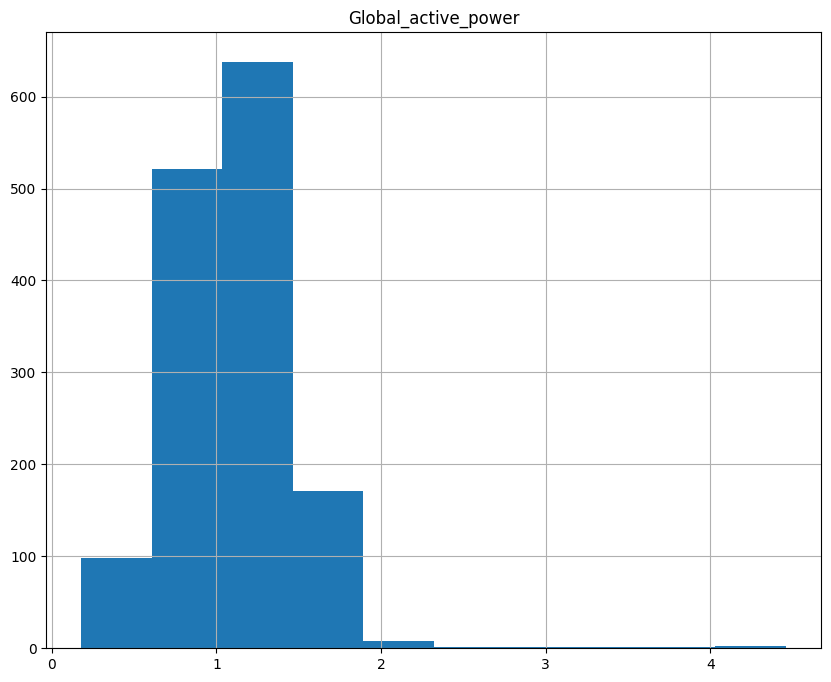

In [ ]:
# Plotting a histogram to visualize the distribution of 'Global_active_power' values
df[['Global_active_power']].hist()

# Explanation:
# - This code generates a histogram to explore the distribution of the 'Global_active_power' variable.
# - Histograms are useful for understanding the frequency distribution of a continuous variable,

In [ ]:
# Reset the index of the DataFrame to convert the 'Datetime' index back into a column
dff = df.reset_index()

# Import the Plotly Express library for interactive plotting
import plotly.express as px

# Create a line plot using Plotly Express
fig = px.line(dff, x='Datetime', y='Global_active_power', title='Datetime vs Global_active_power')

# Enable the range slider on the x-axis for zooming and panning in the plot
fig.update_xaxes(rangeslider_visible=True)

# Display the interactive plot
fig.show()


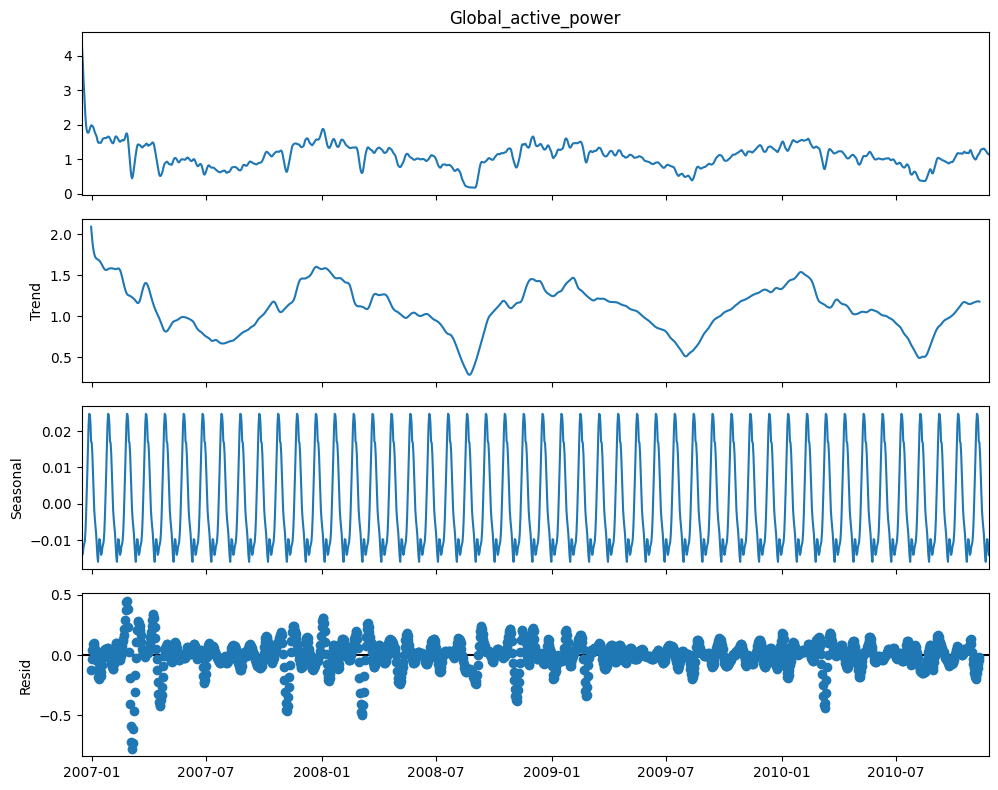

In [ ]:
import statsmodels.api as sm  # Importing the seasonal decomposition function from the statsmodels library

# Perform seasonal decomposition of the 'Global_active_power' time series data
# Model: 'additive' - assumes that the seasonal and trend components are additive
# Period: 12 - specifies the length of the seasonal cycle (e.g., if the data is daily and periodic, use 7 for weekly, 12 for monthly, etc.)
res = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', period=12)

# Plot the seasonal decomposition results
resp = res.plot()

# Display the plot
plt.show()

# Explanation:
# - Seasonal decomposition is a technique used to separate a time series into its constituent components: trend, seasonal, and residual.
# - The 'sm.tsa.seasonal_decompose()' function from the statsmodels library performs this decomposition.
# - Model: 'additive' assumes that the seasonal and trend components are additive, meaning the observed data is the sum of trend, seasonal, and residual components.
# - Period: 30 specifies the length of the seasonal cycle, indicating that the data exhibits a pattern that repeats every 30 time points (e.g., days, months).
# - The result of the decomposition is stored in the 'res' variable.
# - The 'res.plot()' function generates a plot displaying the original time series, along with the decomposed trend, seasonal, and residual components.
# - The 'plt.show()' function displays the plot.


**\( p \)**, **\( d \)**, and **\( q \)** are the key parameters that define the autoregressive, differencing, and moving average components, respectively, of an ARIMA model, which is commonly used for time series forecasting and analysis. Adjusting these parameters helps capture the underlying patterns and characteristics of the time series data

# From onward  we are going to find the max value of p, d, and q as they are the parameter of Arima  Model


# Adfuller
The adfuller function, part of the statsmodels library in Python, is used for conducting the Augmented Dickey-Fuller (ADF) test. The ADF test is a statistical hypothesis test commonly used in time series analysis to determine whether a unit root is present in the time series data.

A unit root suggests that a time series is non-stationary, meaning its statistical properties such as mean and variance change over time. Stationarity is an important concept in time series analysis because many forecasting models assume that the time series data is stationary, i.e., it has constant statistical properties over time.

The ADF test evaluates the null hypothesis that a unit root is present in the time series data, indicating non-stationarity. If the p-value resulting from the ADF test is less than a chosen significance level (e.g., 0.05), then the null hypothesis is rejected, suggesting that the time series is stationary. Conversely, if the p-value is greater than the significance level, the null hypothesis cannot be rejected, indicating that the time series is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller  # Importing the ADF test function from statsmodels library

# Defining a function to check stationarity using the Augmented Dickey-Fuller (ADF) test
def check_stationarity(df):
  # Perform the ADF test on the input time series data
  result = adfuller(df)

  # Print ADF statistic and p-value
  print('ADF statistic:', result[0])
  print('p-value:', result[1])

  # Check if p-value is less than or equal to 0.05 (common significance level)
  if result[1] <= 0.05:
    print('The series is stationary.')  # If p-value is less than or equal to 0.05, the series is considered stationary
  else:
    print('The series is not stationary.')  # If p-value is greater than 0.05, the series is considered non-stationary

# Calling the function to check stationarity of 'Global_active_power' data
check_stationarity(df['Global_active_power'])


ADF statistic :: -3.357421193180784
p_value :: 0.012498902287027136
staionary


# through acf we are going to find the p

In [ ]:
from statsmodels.tsa.stattools import acf, pacf  # Importing the autocorrelation function (ACF) and partial autocorrelation function (PACF) from statsmodels library

# Calculate the autocorrelation function (ACF) of the 'Global_active_power' time series data
x_acf = pd.DataFrame(acf(df['Global_active_power']))

,0
0,1.000000
1,0.962178
2,0.916464
3,0.866461
4,0.816838
5,0.769492
6,0.727587
7,0.693967
8,0.668663
9,0.650547


In [ ]:
p=2

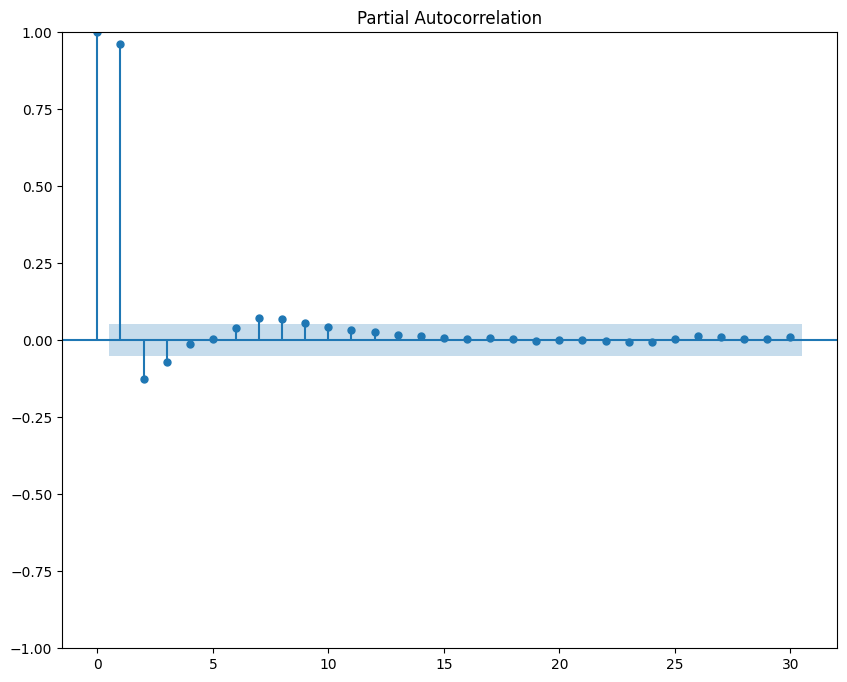

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Importing the functions for plotting ACF and PACF from statsmodels library

# Plot the partial autocorrelation function (PACF) of the 'Global_active_power' time series data
# lags: Number of lags to include in the PACF plot (in this case, up to lag 30)
# alpha: Significance level for confidence intervals (default is 0.05)
plot_pacf(df['Global_active_power'], lags=30, alpha=0.05)

# Display the PACF plot
plt.show()

# Explanation:
# - The 'plot_pacf' function from the statsmodels library is used to plot the partial autocorrelation function (PACF) of a time series.
# - PACF measures the correlation between a time series and its lagged values, while controlling for the effect of shorter lag values.
# - The 'lags' parameter specifies the number of lagged values to include in the PACF plot. Here, it's set to 30.
# - The 'alpha' parameter sets the significance level for confidence intervals. A default value of 0.05 is commonly used.
# - The plot helps in identifying significant partial autocorrelations, which can be used to determine the 'q' value (the number of lagged forecast errors) in an ARIMA model.
# - In an ARIMA model, the 'q' value is typically chosen based on significant PACF values that fall outside the confidence intervals.


## Model Implementation
Describe the model used for forecasting, including any specific configurations and the reasoning behind the choice of this model. Detail the training process.

# What Is an Autoregressive Integrated Moving Average (ARIMA)?
An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.

A statistical model is autoregressive if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance or forecast a company's earnings based on past periods.
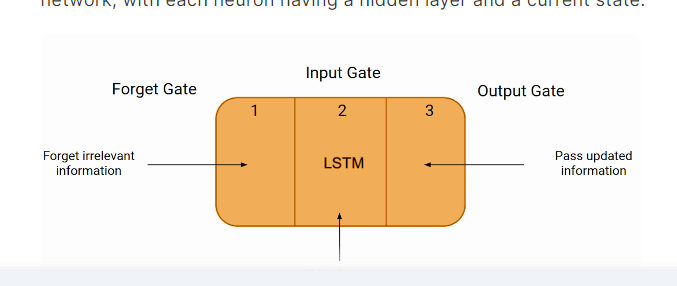

# Understanding Autoregressive Integrated Moving Average (ARIMA)
An autoregressive integrated moving average model is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables. The model's goal is to predict future securities or financial market moves by examining the differences between values in the series instead of through actual values.

An ARIMA model can be understood by outlining each of its components as follows:

**Autoregression (AR):** refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

**Integrated (I):** represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

**Moving average (MA):**  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.


## ARIMA Parameters
Each component in ARIMA functions as a parameter with a standard notation. For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used. The parameters can be defined as:
1

p: the number of lag observations in the model, also known as the lag order.
d: the number of times the raw observations are differenced; also known as the degree of differencing.
q: the size of the moving average window, also known as the order of the moving average.

In [ ]:
# Installing the pmdarima library using pip
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima  # Importing the AutoARIMA function from the pmdarima library
from sklearn.metrics import mean_squared_error  # Importing the mean squared error function from scikit-learn

# Calculating the size of the training set as 80% of the total data
train_size = int(len(df) * 0.8)

# Splitting the data into training and testing sets
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Printing the shape of the training set
print(train.shape)

# Explanation:
# - The 'auto_arima' function from the pmdarima library is used for automatically selecting the best ARIMA model parameters.
# - The 'mean_squared_error' function from scikit-learn is used to calculate the mean squared error, which is a measure of the model's performance.
# - The 'train_size' variable is calculated as 80% of the total length of the DataFrame 'df', which will be used to split the data into training and testing sets.
# - The 'train' DataFrame contains the first 80% of the data, which will be used for model training.
# - The 'test' DataFrame contains the remaining 20% of the data, which will be used for model evaluation.
# - The shape of the training set is printed to verify the number of rows and columns in the training data.


(1153, 7)

In [ ]:
model = auto_arima(train['Global_active_power'], start_P=1, start_q=1, max_p = 2, max_q = 2, m=12, start_p = 0 , seasonal=True, d=0,D=1, trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=10.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=315.712, Time=0.39 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=9.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=315.922, Time=0.13 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=258.523, Time=3.59 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=245.956, Time=4.49 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=246.276, Time=10.79 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=246.516, Time=3.62 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=19.84 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=14.59 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=32.48 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=246.884, Time=2.18 sec

Best model:  ARIMA(0,0,0)(2,1,0)[12] intercept
Total fit time: 119.012 seconds


(32,)

Mean Squared Error: 0.21426831504962499


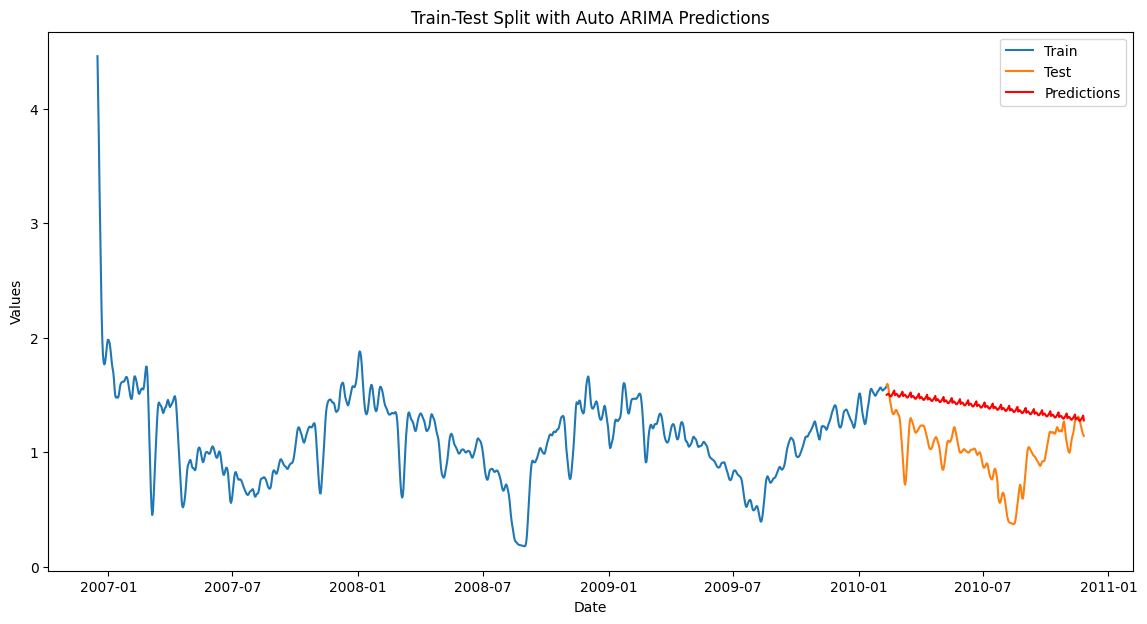

In [ ]:
predictions = model.predict(n_periods=len(test))
# Evaluate the model
mse = mean_squared_error(test['Global_active_power'], predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(train['Global_active_power'], label='Train')
plt.plot(test['Global_active_power'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Train-Test Split with Auto ARIMA Predictions')
plt.legend()
plt.show()

In [ ]:
model = auto_arima(df['Global_active_power'], start_P=1, start_q=1, max_p = 2, max_q = 2, m=12, start_p = 0 , seasonal=True, d=0,D=1, trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=17.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=239.066, Time=0.51 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=9.00 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=14.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=240.217, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=175.729, Time=4.04 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=157.536, Time=7.70 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=158.042, Time=13.82 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=159.364, Time=4.53 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=24.06 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=26.43 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-6192.538, Time=39.77 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=17.26 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=-6266.134, Time=49.35 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-6

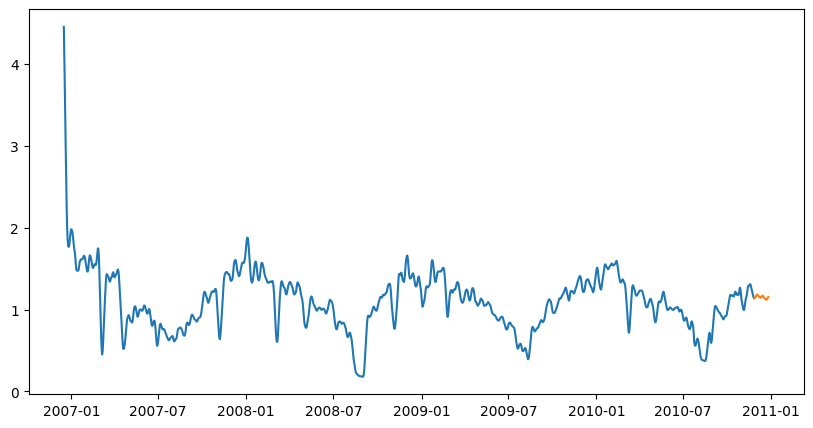

In [ ]:
prediction = model.predict(n_periods =30)
plt.figure(figsize = (10,5))
plt.plot(df['Global_active_power'], label = 'Actual')
plt.plot(prediction, label = 'predict')

# What is LSTM? Introduction to Long Short-Term Memory
## Introduction
Long Short-Term Memory Networks is a deep learning, sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of handling the vanishing gradient problem faced by RNN. LSTM was designed by Hochreiter and Schmidhuber that resolves the problem caused by traditional rnns and machine learning algorithms. LSTM Model can be implemented in Python using the Keras library.

Let’s say while watching a video, you remember the previous scene, or while reading a book, you know what happened in the earlier chapter. RNNs work similarly; they remember the previous information and use it for processing the current input. The shortcoming of RNN is they cannot remember long-term dependencies due to vanishing gradient. LSTMs are explicitly designed to avoid long-term dependency problems.

# The Logic Behind LSTM
The first part chooses whether the information coming from the previous timestamp is to be remembered or is irrelevant and can be forgotten. In the second part, the cell tries to learn new information from the input to this cell. At last, in the third part, the cell passes the updated information from the current timestamp to the next timestamp. This one cycle of LSTM is considered a single-time step.

These three parts of an LSTM unit are known as gates. They control the flow of information in and out of the memory cell or lstm cell. The first gate is called Forget gate, the second gate is known as the Input gate, and the last one is the Output gate. An LSTM unit that consists of these three gates and a memory cell or lstm cell can be considered as a layer of neurons in traditional feedforward neural network, with each neuron having a hidden layer and a current state.

LSTM gates, LSTM Models
Just like a simple RNN, an LSTM also has a hidden state where H(t-1) represents the hidden state of the previous timestamp and Ht is the hidden state of the current timestamp. In addition to that, LSTM also has a cell state represented by C(t-1) and C(t) for the previous and current timestamps, respectively.

Here the hidden state is known as Short term memory, and the cell state is known as Long term memory. Refer to the following image.

LSTM memory
It is interesting to note that the cell state carries the information along with all the timestamps.

[https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/](https://)

In [ ]:
df1=df['Global_active_power']

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

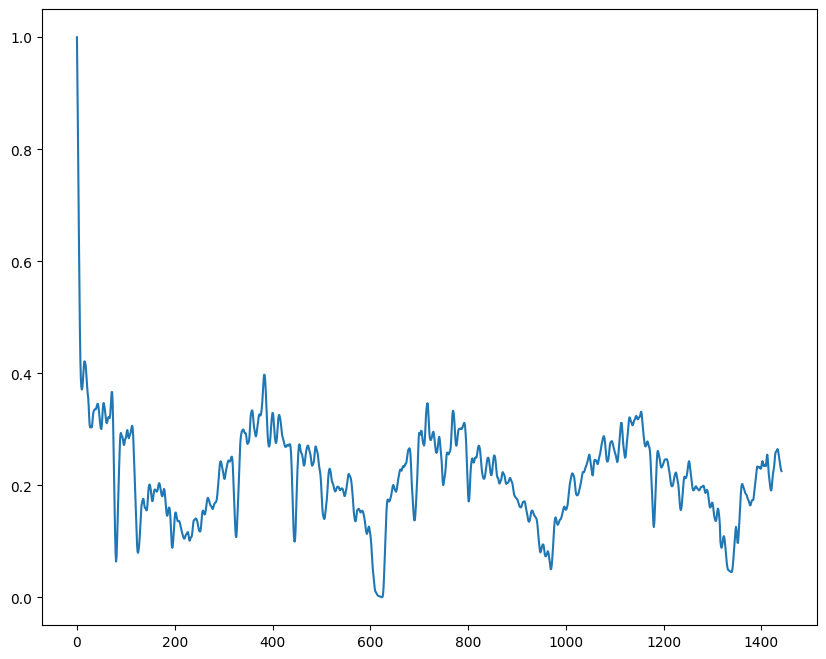

In [ ]:
plt.plot(df1)

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train = df1[0:training_size]
train.shape

(937, 1)

In [ ]:
test = df1[training_size:len(df1)]
print(training_size,"  ",test_size)

937    505


In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  datax,datay= [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return numpy.array(datax), numpy.array(datay)

In [ ]:
time_step=100
x_train , y_train = create_dataset(train,time_step)
x_test, y_test=create_dataset(test, time_step)

In [ ]:
x_train.shape

(836, 100)

In [ ]:
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 265ms/step - loss: 3.4813e-05 - val_loss: 3.1731e-05
Epoch 2/100
14/14 [==============================] - 2s 168ms/step - loss: 3.6792e-05 - val_loss: 3.3082e-05
Epoch 3/100
14/14 [==============================] - 2s 167ms/step - loss: 3.3810e-05 - val_loss: 2.8965e-05
Epoch 4/100
14/14 [==============================] - 2s 168ms/step - loss: 3.2743e-05 - val_loss: 2.8514e-05
Epoch 5/100
14/14 [==============================] - 3s 192ms/step - loss: 3.5562e-05 - val_loss: 3.5437e-05
Epoch 6/100
14/14 [==============================] - 4s 277ms/step - loss: 2.9685e-05 - val_loss: 5.3490e-05
Epoch 7/100
14/14 [==============================] - 2s 170ms/step - loss: 3.8258e-05 - val_loss: 2.9864e-05
Epoch 8/100
14/14 [==============================] - 3s 208ms/step - loss: 3.5314e-05 - val_loss: 7.8681e-05
Epoch 9/100
14/14 [==============================] - 3s 172ms/step - loss: 4.4242e-05 - val_loss: 4.8889e-05
Epoch 10/100
14/14 

In [ ]:
import tensorflow as tf
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

13/13 [==============================] - 1s 66ms/step


In [ ]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred))

0.8617380517663219

In [ ]:
math.sqrt(mean_squared_error(y_test, test_pred))

0.8735723153289303

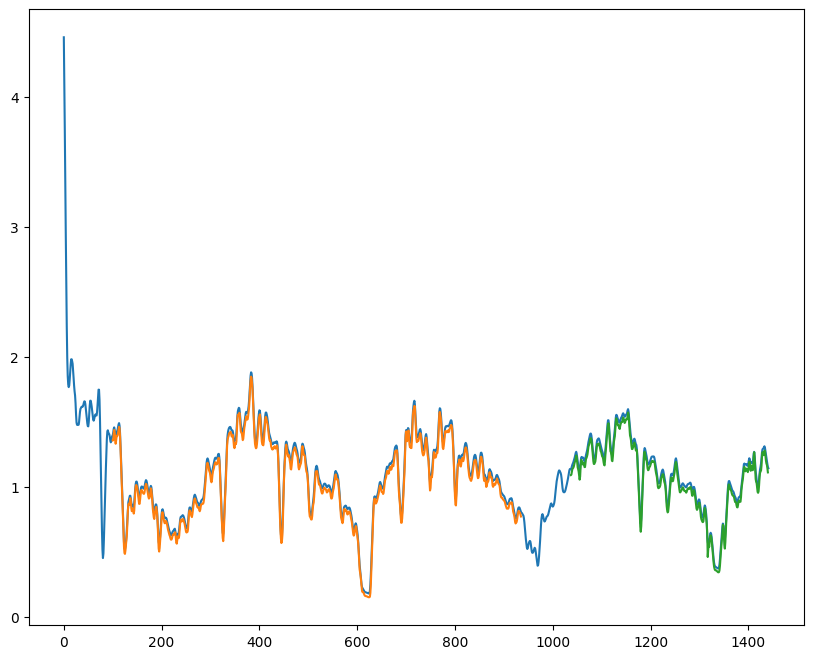

In [ ]:
look_back=100
train_predict_plot = numpy.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_pred)+look_back,:]=train_pred

test_predict_plot = numpy.empty_like(df1)
test_predict_plot[:,:]=np.nan
test_predict_plot[len(train_pred)+(look_back*2)+1:len(df1)-1,:]=test_pred

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [ ]:
x_input=test[405:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.21643093]
101
1 day input [0.0735371  0.08516444 0.09610187 0.1083007  0.12040115 0.12572859
 0.12041876 0.10812767 0.09747415 0.09708194 0.10691454 0.12179613
 0.13868137 0.15517889 0.17111494 0.18619293 0.1968532  0.20192085
 0.20223248 0.19967984 0.19710582 0.19464527 0.1916377  0.18858794
 0.18602228 0.18456707 0.1835592  0.18195758 0.17902209 0.17579987
 0.17392619 0.17216158 0.16916785 0.16601931 0.1639758  0.1651102
 0.16897525 0.17209048 0.17343197 0.17368122 0.17363369 0.17722882
 0.18529053 0.19429108 0.20257118 0.20987322 0.21774985 0.22667295
 0.2327902  0.23372246 0.232217   0.23165136 0.23234285 0.23278712
 0.23166466 0.22962102 0.22981362 0.23356412 0.23937962 0.24318988
 0.24108199 0.23631811 0.23423656 0.23556314 0.23663594 0.23436895
 0.23416112 0.24191488 0.25195891 0.25470089 0.24633882 0.23199077
 0.2199147  0.21172287 0.20423564 0.19697549 0.19196214 0.19075844
 0.19557561 0.20557471 0.2158227  0.2231881  0.22786951 0.2338679
 0.24410278 0.25411296 0.25927185 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

1442

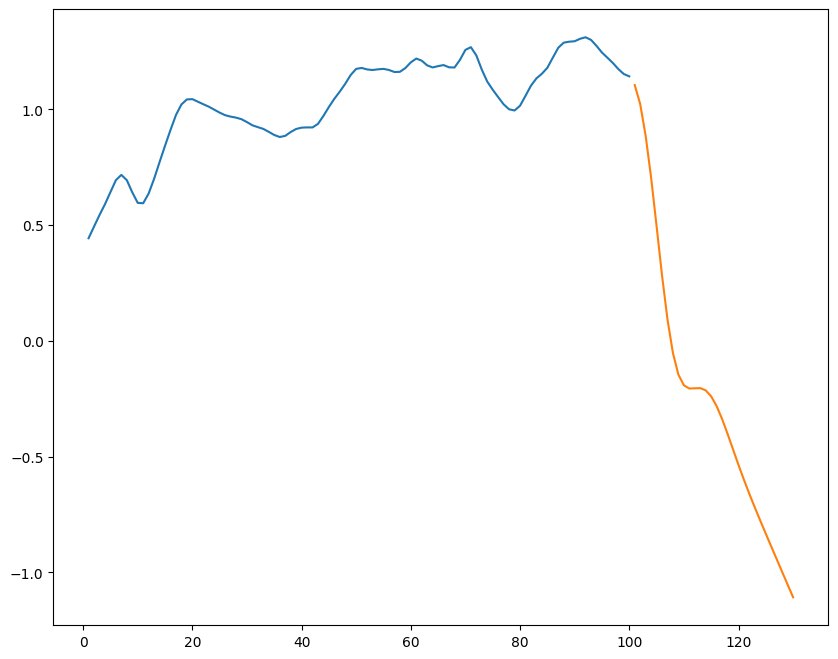

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1342:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

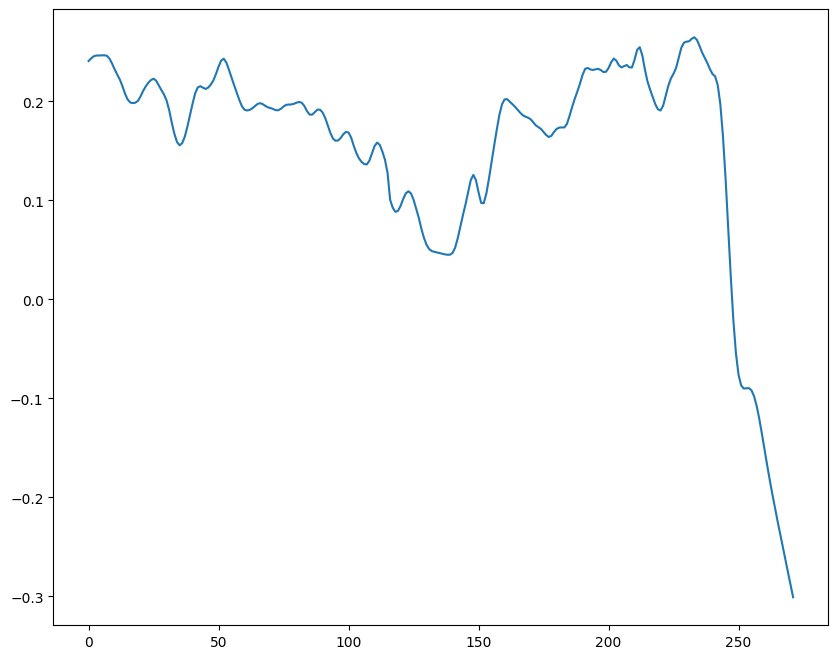

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])